# Project 1: Investigate a Dataset
submitted by: Suraj Gurav

#### Dataset: TMDb Movies Dataset
Date: 11.05.2020

This Notebook is submitted as part of _Udacity Data Analyst Nanodegree_ program

### Overview

This dataset contains record of 10866 movies and 21 features for each movie. The more details about the dataset are explained in the subsequent sections.

#### Assumptions
This investigation is based on the following assumptions:
1. As the columns _budget_adj_ and _revenue_adj_ are given in terms of US Dollars, the columns _budget_ and _revenue_ in US Dollars. 
2. The _runtime_ for movies is considered in Minutes.
3. More the the value in _popularity_ column, more popular is the movie.
4. Whereever _budget_ and _revenue_ values are _0_, it is assumed that these values are not recorded in the dataset.

__Outline__ : To investigate the dataset and find the answers to different questions I followed the below steps

1. [Questions can be answered](#1.-Questions-can-be-answered)
2. [User Defined Functions](#2.-User-Defined-Functions)
3. [Import required libraries](#3.-Import-Required-Libraries)
4. [Data cleaning](#4.-Data-Cleaning)
5. [Data wrangling](#5.-Data-Wrangling)
6. [Exploratory Data Analysis](#6.-Exploratory-Data-Analysis-(EDA))
    * [Research Question 1](#Research-Question-1:-Maximum-and-Minumum-Values) : Maximum and minimum values
    * [Research Question 2](#Research-Question-2:-Average-Values) : Average Values
    * [Research Question 3](#Research-Question-3:-Is-there-any-relationship-between-budget,-revenue,-profit,-runtime-and-votes-?) : Budget-revenue-profit-runtime-votes relationship
    * [Research Question 4](#Research-Question-4:-Common-Appearance) : Common appearance
    * [Research Question 5](#Research-Question-5:-Similarities-of-Profitable-Movies) : Similarities of movies with \\$300 million or more profit
7. [Conclusion](#7.-Conclusion)

---

### 1. Questions can be answered

- Very first questions that come to my mind were objective type - having only yes or no answers such as is there any relationship between budget and revenue generated, run time and budget. These questions can be simply answered by directly looking into the graphs for these features, for which we can use seaborn library.
- Secondly, some numerical data can be collected through answering the questions such as what is the name of the movie with maximum, minimum budget, revenue, popularity, vote count and run time. For these pandas library can be used
- Also, from a complete dataset, average values for budget, revenue, run time can be found out
- some movies can be collected based on certain criteria, and different exploratory analysis can be performed on it.

### 2. User Defined Functions

To avoid writing the similar code multiple times, 3 user defined functions were defined and used in this notebook.
These functions are:

1. [maxmin_movies()](#Research-Question-1:-Maximum-and-Minumum-Values)

2. [avg_movies()](#Research-Question-2:-Average-Values)

3. [splitandcollect()](#Research-Question-4:-Common-Appearance)
        

---

### 3. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
print(' All Packages Imported !!!')

 All Packages Imported !!!


In [2]:
# read dataset
df_tmdb=pd.read_csv('tmdb-movies.csv')

In [3]:
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
row,col=df_tmdb.shape
print('This dataframe has {} rows and {} columns'.format(row,col))

This dataframe has 10866 rows and 21 columns


In [5]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This shows that, the columns _cast, homepage, director, tagline, keywords, overview, genres and production_companies_ have few NaN.

### 4. Data Cleaning

To answer the type of questions mentioned above, this dataset need to be cleaned and only the required columns will be maintained in the final dataframe.

There can be few movies, for which budget and revenue is _0_. Let us assume that the budget data for these movies are not recorded and hence not present in the dataset. Hence, these rows (movies data will be removed from the dataframe)


Let us start with checking if the dataframe has duplicate rows or not. If it has duplicate rows, then those will be removed and only first appearance of row will be kept. 

In [6]:
#drop duplicate rows
df_tmdb.drop_duplicates(keep = 'first', inplace = True)

rows, col = df_tmdb.shape
print('There are {} total number of movies and {} features for each movie.'.format(rows-1, col))

There are 10864 total number of movies and 21 features for each movie.


In [7]:
Na_collection=['budget','revenue']
df_tmdb[Na_collection]=df_tmdb[Na_collection].replace(0,np.NaN) # converting the value 0 in budget and revenue column to NaN
df_tmdb.dropna(subset=Na_collection,inplace=True) # dropping movies which belong to these NaN from dataframe

rows, col = df_tmdb.shape
print('Now there are total {} movies.'.format(rows))

Now there are total 3854 movies.


### 5. Data Wrangling

No measure is mentioned about the popularity of a movie, hence this column doesn't provide any robust information about a movie. It can be removed from the dataframe. Similarly there are other columns such as _id, imdb_id, homepage, tagline, keywords, production_companies, budget_adj, revenue_adj, overview_ which contribute very less or nothing to answer my questions and can be removed.

Hence, a new dataframe will be formed using the selected columns from the original dataframe.

In [8]:
df_movies=df_tmdb[["original_title","budget","revenue","runtime","release_year","vote_count","director","genres"]]
df_movies.head()

,original_title,budget,revenue,runtime,release_year,vote_count,director,genres
0,Jurassic World,150000000.0,1.513529e+09,124,2015,5562,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,150000000.0,3.784364e+08,120,2015,6185,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,110000000.0,2.952382e+08,119,2015,2480,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,200000000.0,2.068178e+09,136,2015,5292,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,190000000.0,1.506249e+09,137,2015,2947,James Wan,Action|Crime|Thriller


In [9]:
df_movies.tail()

,original_title,budget,revenue,runtime,release_year,vote_count,director,genres
10822,Who's Afraid of Virginia Woolf?,7500000.0,33736689.0,131,1966,74,Mike Nichols,Drama
10828,Torn Curtain,3000000.0,13000000.0,128,1966,46,Alfred Hitchcock,Mystery|Thriller
10829,El Dorado,4653000.0,6000000.0,120,1966,36,Howard Hawks,Action|Western
10835,The Sand Pebbles,12000000.0,20000000.0,182,1966,28,Robert Wise,Action|Adventure|Drama|War|Romance
10848,Fantastic Voyage,5115000.0,12000000.0,100,1966,42,Richard Fleischer,Adventure|Science Fiction


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  3854 non-null   object 
 1   budget          3854 non-null   float64
 2   revenue         3854 non-null   float64
 3   runtime         3854 non-null   int64  
 4   release_year    3854 non-null   int64  
 5   vote_count      3854 non-null   int64  
 6   director        3853 non-null   object 
 7   genres          3854 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 271.0+ KB


In [Data Cleaning](#2.-Data-Cleaning) step, we have found that there are <code>3854</code> total number of movies in cleaned dataset. In the above cell, it can be seen that, the Non-Null Count is 3854 for all the columns except for _director_ column. So, removing the one movie data for which director name is missing.

In [11]:
k=df_movies[df_movies['director'].isna()==True].index
df_movies.drop(k,inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  3853 non-null   object 
 1   budget          3853 non-null   float64
 2   revenue         3853 non-null   float64
 3   runtime         3853 non-null   int64  
 4   release_year    3853 non-null   int64  
 5   vote_count      3853 non-null   int64  
 6   director        3853 non-null   object 
 7   genres          3853 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 270.9+ KB


C:\Users\Suraj\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, we have total data of <code>3853</code> movies with no missing values

The data type for columns _budget_ and _revenue_ is <code>float64</code>, which can be converted into <code>int64</code>

In [12]:
df_movies["budget"]=df_movies["budget"].astype('int64')
df_movies["revenue"]=df_movies["revenue"].astype('int64')
df_movies.dtypes

C:\Users\Suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


original_title    object
budget             int64
revenue            int64
runtime            int64
release_year       int64
vote_count         int64
director          object
genres            object
dtype: object

Now all the columns are in desired data types.

The columns budget and revenue has no unit. Let us assume __budget__ and __revenue__ are in __US Dollars__.

let us add one additional column __profit__ into the dataframe. The unit of profit is again __US Dollars__.
The profit is calculated as <code>Profit</code> = <code>Revenue</code> - <code>Budget</code>

In [13]:
df_movies.insert(3, 'profit', df_movies['revenue'] - df_movies['budget'])
df_movies['profit']=df_movies['profit'].astype('int64') # making its data type as same as revenue and budget
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  3853 non-null   object
 1   budget          3853 non-null   int64 
 2   revenue         3853 non-null   int64 
 3   profit          3853 non-null   int64 
 4   runtime         3853 non-null   int64 
 5   release_year    3853 non-null   int64 
 6   vote_count      3853 non-null   int64 
 7   director        3853 non-null   object
 8   genres          3853 non-null   object
dtypes: int64(6), object(3)
memory usage: 301.0+ KB


C:\Users\Suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_movies.head()

,original_title,budget,revenue,profit,runtime,release_year,vote_count,director,genres
0,Jurassic World,150000000,1513528810,1363528810,124,2015,5562,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,150000000,378436354,228436354,120,2015,6185,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,110000000,295238201,185238201,119,2015,2480,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225,136,2015,5292,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,190000000,1506249360,1316249360,137,2015,2947,James Wan,Action|Crime|Thriller


With this the Data Wrangling / transformation step is complete. Now we can do analysis of this cleaned and transformed dataset to answer the questions.

------

### 6. Exploratory Data Analysis (EDA)

#### Research Question 1: Maximum and Minumum Values

            1.1 What are the names of movies with maximum and minimum budget ?
            1.2 What are the names of movies with maximum and minimum revenue ?
            1.3 What are the names of movies with maximum and minimum profit ?
            1.4 What are the names of movies with maximum and minimum votes ?
            1.5 What are the names of movies with maximum and minimum runtime ?

since, all the questions of maximum and minimum values will be answered, let us define a function to get these answers.

In [15]:
def maxmin_movies(col_name):
    max_id=df_movies[col_name].idxmax()
    max_movie=pd.DataFrame(df_movies.loc[max_id,["original_title",col_name,"director","genres","release_year"]])
    min_id=df_movies[col_name].idxmin()
    min_movie=pd.DataFrame(df_movies.loc[min_id,["original_title",col_name,"director","genres","release_year"]])
    
    df_answer=pd.concat([max_movie,min_movie],axis=1)
    
    return df_answer

__Answer 1.1__: The names of movies with maximum and minimum budget

In [16]:
maxmin_movies('budget')

,2244,2618
original_title,The Warrior's Way,Lost & Found
budget,425000000,1
director,Sngmoo Lee,Jeff Pollack
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_year,2010,1999


The movie __The Warrior's Way__ released in year 2010 and directed by Sngmoo Lee had the maximum budget of __\\$425__ million

The movie __Lost & Found__ released in year 1999 and directed by Jeff Pollack had the minimum budget of __\\$1__ only.

The findings from this question increased my curiosity for understanding the other details of movie which had budget of just \\$1. Hence, let us fetch the details of this movie from original dataset

In [17]:
df_tmdb[df_tmdb['original_title']=='Lost & Found']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,39964,tt0120836,0.090186,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,A comedy about finding your true love at any p...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,14,4.8,1999,1.309053,130.905285


The movie __Lost & Found__ produced with only \\$ 1 budget was of 95 minutes and generated revenue of \\$ 100

__Answer 1.2__: The names of movies with maximum and minimum revenue

In [18]:
maxmin_movies('revenue')

,1386,5067
original_title,Avatar,Shattered Glass
revenue,2781505847,2
director,James Cameron,Billy Ray
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_year,2009,2003


The movie __Avatar__ released in year 2009 and directed by James Cameron generated maximum revenue of __\\$2.78__ billion

The movie __Shattered Glass__ released in year 2003 and directed by Billy Ray generated maximum revenue of __\\$2__

__Answer 1.3__: The names of movies with maximum and minimum profit

In [19]:
maxmin_movies('profit')

,1386,2244
original_title,Avatar,The Warrior's Way
profit,2544505847,-413912431
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_year,2009,2010


The movie __Avatar__ released in year 2009 and directed by James Cameron earned maximum __profit__ of __\\$2.5__ billion

The movie __The Worrior's Way__ released in year 2010 and directed by Sngmoo Lee faced the __loss__ of __\\$413.9__ million

__Answer 1.4__: The names of movies with maximum and minimum votes

In [20]:
maxmin_movies('vote_count')

,1919,1818
original_title,Inception,Beautiful
vote_count,9767,10
director,Christopher Nolan,Dean O'Flaherty
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Drama|Mystery|Thriller
release_year,2010,2009


The movie __Inception__ released in year 2010 and directed by Christopher Nolan was voted maximum i.e. __9767__ times

The movie __Beautiful__ released in year 2009 and directed by Dean O'Flaherty got as less as __10__ votes.

__Answer 1.5__: The names of movies with maximum and minimum runtime

In [21]:
maxmin_movies('runtime')

,2107,5162
original_title,Carlos,Kid's Story
runtime,338,15
director,Olivier Assayas,Shinichiro Watanabe
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_year,2010,2003


Here, it looks like the History, drama based movies had more content to show and so the movie __Carlos__ released in year 2010 has the total duration of 338 minutes. However, the __Kid's story__ - the animation genre film was the shortest duration movie.

From answers of [Research Question 1](#Research-Question-1), it is found that the movies belonging to Action, Science Fiction, Adventure, Fantasy had the maximum budget, revenue and profit. Surprisingly, the movie which faced highest loss also belongs to the similar genres.

Even though the column _popularity_ in original dataset doesn't provide any information about the values in this column. Let us assume that more the value of column _popularity_, more popular the movie is. Hence, I explored some more data from the original dataframe and found the below results.

In [22]:
df_popular=df_tmdb.sort_values(by='popularity',ascending=False)
df_popular[["original_title","popularity","genres"]].head(10)

,original_title,popularity,genres
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller
629,Interstellar,24.949134,Adventure|Drama|Science Fiction
630,Guardians of the Galaxy,14.311205,Action|Science Fiction|Adventure
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller
631,Captain America: The Winter Soldier,12.971027,Action|Adventure|Science Fiction
1329,Star Wars,12.037933,Adventure|Action|Science Fiction
632,John Wick,11.422751,Action|Thriller
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy
633,The Hunger Games: Mockingjay - Part 1,10.739009,Science Fiction|Adventure|Thriller


The movies in _Science Fiction, Adventure, Action, Thriller_ genres not only had the highest budget but also these movies were more popular amongst all the movies present in the dataset

----

#### Research Question 2: Average Values
            
            2.1 What is average budget of movies ?
            2.2 What is average revenue generated by movies ?
            2.3 What is average profit made by movies ?
            2.4 What is average runtime of movies ?

Again we are about find the average values of all the features. Hence, let's make another function.

In [23]:
def avg_movies(col_name):
    return df_movies[col_name].mean()

__Answer 2.1__: Average budget

In [24]:
print('The average budget of all the movies is = $%f'%avg_movies('budget'))

The average budget of all the movies is = $37212267.859849


__Answer 2.2__: Average revenue

In [25]:
print('The average revenue generated by all the movies is = $%f'%avg_movies('revenue'))

The average revenue generated by all the movies is = $107711709.951207


__Answer 2.3__: Average profit

In [26]:
print('The average profit of all the movies is = $%f'%avg_movies('profit'))

The average profit of all the movies is = $70499442.091357


__Answer 2.4__: Average runtime

In [27]:
print('The average runtime of all the movies is = %f minutes'%avg_movies('runtime'))

The average runtime of all the movies is = 109.208928 minutes


To understand the runtime of all movies in even better way, we can use the boxplot. and for it we can use seaborn library.

Text(0.5, 0, 'runtime')

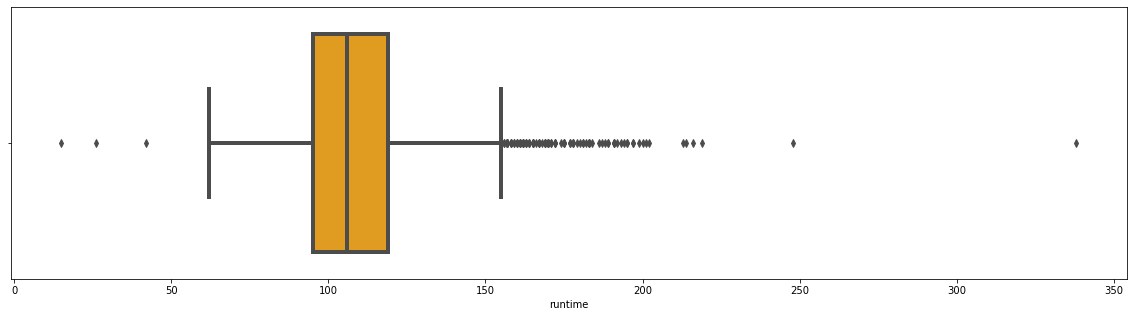

In [28]:
plt.style.use('seaborn-muted')
ax=plt.figure(figsize=(20,5))
ax=sns.boxplot(df_movies['runtime'],linewidth=4,color='orange')
ax.set_xlabel('runtime')

From this box plot, 25% of movies have runtime 95 minutes, 50% of movies have runtime of 106 minutes. The maximum and minimum values are already found in the [Research Question 1](#Research-Question-1) and same values are visualized in this box plot.

---

__Research Question 3: Is there any relationship between budget, revenue, profit, runtime and votes ?__

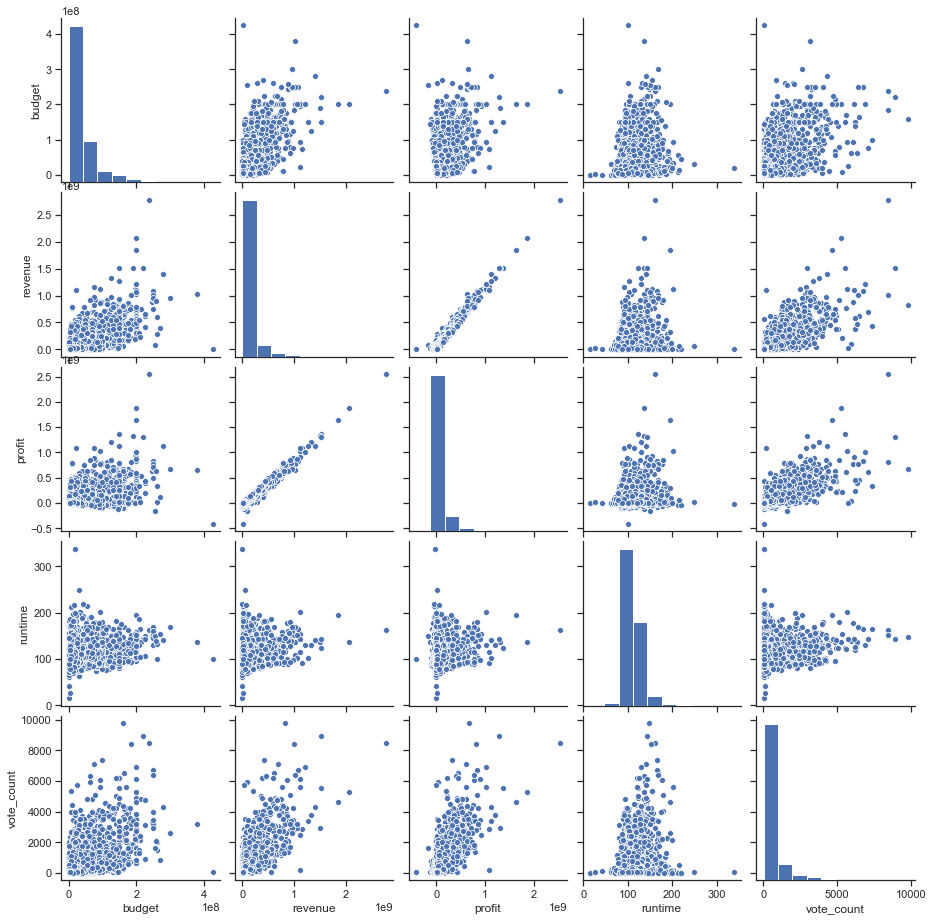

In [29]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_movies[["budget","revenue","profit","runtime","vote_count"]])

All the features _budget, revenue, profit, runtime_ and _vote_count_ are plotted in the same figure using seaborn pairplot.
However, no direct relationship is observed among them except for _revenue_ and _profit_. As revenue increases the profit also increases. So, there are very few movies for which revenue generated is lower than the budget. In the current dataset of movies data from year 1960 to 2015, it can be said that very few movies faced loss.

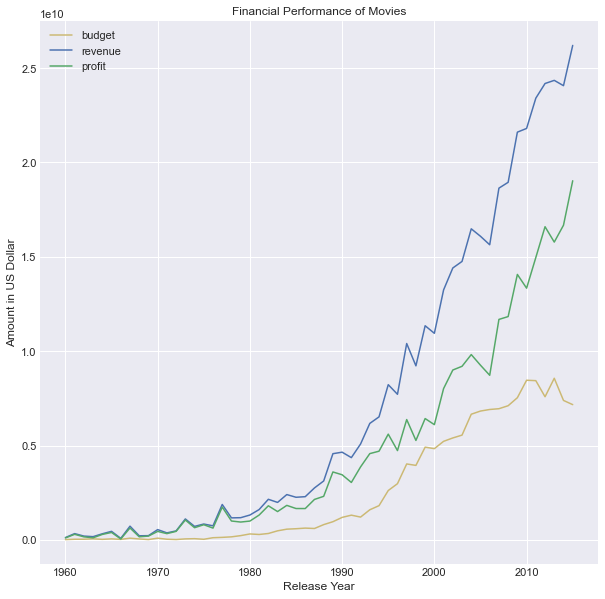

In [30]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
per_year_budget=df_movies.groupby('release_year')['budget'].sum()
per_year_revenue=df_movies.groupby('release_year')['revenue'].sum()
per_year_profit=df_movies.groupby('release_year')['profit'].sum()
plt.plot(per_year_budget,'-y', label='budget')
plt.plot(per_year_revenue,'-b', label='revenue')
plt.plot(per_year_profit,'-g', label='profit')
plt.xlabel('Release Year')
plt.ylabel('Amount in US Dollar')
plt.title('Financial Performance of Movies')
plt.legend()
plt.show()

It can be seen that, in last 2 decades there is sharp increase in budget, revenue and profit from the movies. However, after year 2010 the budget of movies shows decreasing trend.

----

#### Research Question 4: Common Appearance

            4.1 Which Director directed maximum number of movies ?
            4.2 Which Actor appeared in most of the movies ?
            4.3 Which genre of movies was produced most of the times in current dataset ?
            4.4 Which genre is common amongst top 10 high budget movies ?
            4.5 Which genre is common amongst top 10 high profit movies ?
            4.6 Which genre is common amongst top 10 high runtime movies ?

Again, I will be finding answer for similar type of questions and there are some special characters in the _director, cast_ and _genres_ columns, I will write a function. This function will collect the data from these individual columns, arrange them in series and make a count.

To answer some of these questions, I need to use the <code>df_tmdb</code> dataset which is prepared before Data Wrangling step

In [31]:
def splitandcollect(col_name):
    coldata=pd.Series(df_tmdb[col_name].str.cat(sep='|').split('|'))
    count_coldata=coldata.value_counts(ascending=False)
    return count_coldata

__Answer 4.1__: Director with maximum number of movies

In [32]:
splitandcollect('director')

Steven Spielberg       28
Clint Eastwood         24
Ridley Scott           21
Woody Allen            18
Tim Burton             17
                       ..
Eric Leighton           1
Benedikt Erlingsson     1
Darren Stein            1
Joseph Sargent          1
Akiva Schaffer          1
Length: 1785, dtype: int64

There are 1785 total number of directors in the dataset and out of them __Steven Spielberg__ directed maximum of __28__ movies. In this race, he is followed by _Clint Eastwood_ and _Ridley Scott_ with 24 and 21 movies respectively.

__Answer 4.2__: Frequently appeared actor

In [33]:
splitandcollect('cast')

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
                      ..
Jonathan Freeman       1
Peter Fonda            1
Phoebe Fox             1
Julanne Chidi Hill     1
Sarah Peirse           1
Length: 6839, dtype: int64

Out of 6839 total number of actors, __Robert De Niro__ was appeared maximum number of times. He worked in __52__ movies

__Answer 4.3__: Frequently appeared genres

[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Genre wise Movie Count')]

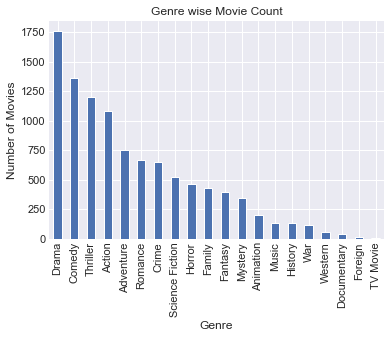

In [34]:
splitandcollect('genres').plot.bar().set(title='Genre wise Movie Count',xlabel='Genre',ylabel='Number of Movies')

As I had previously observed that, the number of genres was not so large and hence can be represented in a graph, so I directly generated the graph. Clearly, __Drama__ wins the count-competition with maximum __1750__ movies followed by _Comedy, Thriller, Action_ and _Adventure_.

In the next questions, I will explore which genre movies had the highest budget and which genre movies earned the huge profit.

------

let us create a new dataframe <code>df_gencount</code> as a slice from <code>df_tmdb</code> dataframe. This will be used to answer the questions 4.4, 4.5 and 4.6

In [35]:
df_gencount=df_tmdb.loc[:,["original_title","genres","runtime","budget","revenue"]]
df_gencount["profit"]=df_gencount["revenue"]-df_gencount["budget"]
df_gencount["budget"]=df_gencount["budget"].astype('int64')
df_gencount["profit"]=df_gencount["profit"].astype('int64')
df_gencount.drop(["revenue"],axis=1,inplace=True)
df_gencount.head()

,original_title,genres,runtime,budget,profit
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,150000000,1363528810
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,120,150000000,228436354
2,Insurgent,Adventure|Science Fiction|Thriller,119,110000000,185238201
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,136,200000000,1868178225
4,Furious 7,Action|Crime|Thriller,137,190000000,1316249360


In [36]:
df_gencount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  3854 non-null   object
 1   genres          3854 non-null   object
 2   runtime         3854 non-null   int64 
 3   budget          3854 non-null   int64 
 4   profit          3854 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 340.7+ KB


this step confirmed that all the data we need is in right data type.

__Answer 4.4__: Common Genre in top 10 highest budget movies

In [37]:
df_gencount.sort_values(by="budget",ascending=False,inplace=True)
top10=df_gencount.head(10)
coldata=pd.Series(top10["genres"].str.cat(sep='|').split('|'))
countbudget=coldata.value_counts(ascending=False)
countbudget

Adventure          9
Action             8
Fantasy            7
Science Fiction    3
Western            2
Family             2
Animation          1
Thriller           1
dtype: int64

__Adventurous__ movies are common in top 10 high budget movies. Out of top 10 movies, __9__ movies belong to Adventure genre. As few as only 1 movie belongs to each of _Thriller_ and _Animation_ genre.
Let us check what type of movies are common in high profit earning movies.

__Answer 4.5__: Common Genre in top 10 high profit making movies

In [38]:
df_gencount.sort_values(by="profit",ascending=False, inplace=True)
top10p=df_gencount.head(10)
coldata=pd.Series(top10p["genres"].str.cat(sep='|').split('|'))
countprofit=coldata.value_counts(ascending=False)
countprofit

Adventure          7
Action             7
Science Fiction    5
Thriller           4
Fantasy            3
Crime              2
Drama              2
Family             2
Animation          1
Mystery            1
Romance            1
dtype: int64

Similar trend is observed in high profit earning movies. So, in top 10 high profit earning movies __7__ were of __Adventure__ and _Action_ genre. When we consider profit earned by movies few more genres such as _Romance, Mistery_ and _Crime_ come into the picture with 1 movie each.

__Answer 4.6__: Common Genre in top 10 high runtime movies

In [39]:
df_gencount.sort_values(by="runtime",ascending=False, inplace=True)
top10r=df_gencount.head(10)
coldata=pd.Series(top10r["genres"].str.cat(sep='|').split('|'))
countruntime=coldata.value_counts(ascending=False)
countruntime

Drama        9
History      8
Adventure    3
Action       3
Crime        2
War          2
Western      1
Foreign      1
Fantasy      1
Thriller     1
Romance      1
dtype: int64

In [40]:
top10r

,original_title,genres,runtime,budget,profit
2107,Carlos,Crime|Drama|Thriller|History,338,18000000,-17128721
10443,Cleopatra,Drama|History|Romance,248,31115000,26635000
7332,Heaven's Gate,Action|Drama|History|Western,219,44000000,-40515669
9850,Lawrence of Arabia,Adventure|Drama|History|War,216,15000000,55000000
5065,Gods and Generals,Drama|History|War,214,56000000,-43076064
3110,Jodhaa Akbar,Action|Adventure|Drama|Foreign|History,213,8376800,4623200
8282,Malcolm X,Drama|History,202,34000000,14169908
4949,The Lord of the Rings: The Return of the King,Adventure|Fantasy|Action,201,94000000,1024888979
9758,The Godfather: Part II,Drama|Crime,200,13000000,34542841
10716,The Greatest Story Ever Told,Drama|History,199,20000000,-8000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

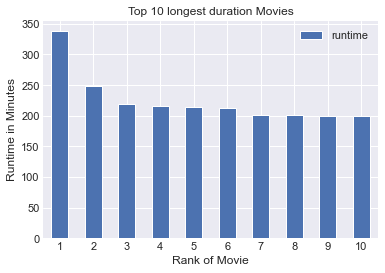

In [53]:
top10r.set_index(np.arange(1,11),inplace=True)
top10r.plot(y=["runtime"],kind='bar')
plt.xlabel('Rank of Movie')
plt.ylabel('Runtime in Minutes')
plt.title('Top 10 longest duration Movies')
plt.xticks(rotation='horizontal')

Tough competition !! Except from the 1st Movie __Carlos__ which runs for __338__ minutes, there is tough competition amongs all the movies to be in top 10 longest duration movies. The difference between duration of 2 subsequent movies is just 1 to 10 minutes.

When runtime is considered as ordering parameter, __Drama__ genre tops the chart with __9__ out of 10 movies followed by __History__ based movies. From the above dataframe, 40% of _Drama_ and _History_ movies are not making profit, rather they faced loss.

----

__Research Question 5: Similarities of Profitable Movies__

The movies with profit of __$300 million__ or more are considered as Profitable Movies and called as __\\$300 million club movies__

            5.1 Which genre was most frequent in the profitable movies ?
            5.2 Which Actor appeared in most of the profitable movies ?
            5.3 Which Director directed maximum number of profitable movies ?
            
            


Creating a new dataframe <code>df_profcount</code> as a slice from <code>df_tmdb</code> dataframe. This will be used to answer this question.

In [41]:
df_profcount=df_tmdb.loc[:,["genres","cast","director","budget","revenue"]]
df_profcount["profit"]=df_profcount["revenue"]-df_profcount["budget"]
df_profcount["budget"]=df_profcount["budget"].astype('int64')
df_profcount["profit"]=df_profcount["profit"].astype('int64')
df_profcount.drop(["revenue","budget"],axis=1,inplace=True)
df_profcount=df_profcount[df_profcount['profit']>=300000000]
df_profcount.head()

,genres,cast,director,profit
0,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1363528810
3,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,1868178225
4,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,1316249360
5,Western|Drama|Adventure|Thriller,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,397950503
7,Drama|Adventure|Science Fiction,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,487380321


In [42]:
df_profcount.shape

(225, 4)

Fantastic !! There were __225__ movies in $300 million club

In [43]:
df_profcount.sort_values(by="profit",ascending=False,inplace=True)
df_profcount.head()

,genres,cast,director,profit
1386,Action|Adventure|Fantasy|Science Fiction,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2544505847
3,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,1868178225
5231,Drama|Romance|Thriller,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,1645034188
0,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1363528810
4,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,1316249360


__Answer 5.1__: Most frequent genre in profitable movies

Adventure    132
Action       108
Family        67
Fantasy       66
Comedy        61
dtype: int64

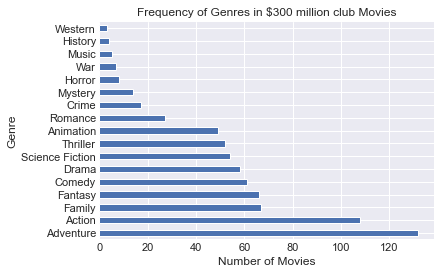

In [57]:
colgen=pd.Series(df_profcount["genres"].str.cat(sep='|').split('|'))
countgen=colgen.value_counts(ascending=False)
countgen.plot.barh().set(title='Frequency of Genres in $300 million club Movies', xlabel='Number of Movies',ylabel='Genre')
countgen.head()

__Answer 5.2__: Most frequent actor in profitable movies

In [45]:
colcast=pd.Series(df_profcount["cast"].str.cat(sep='|').split('|'))
countcast=colcast.value_counts(ascending=False)
countcast.head()

Tom Hanks           9
Harrison Ford       9
Tom Cruise          8
Rupert Grint        8
Daniel Radcliffe    8
dtype: int64

__Answer 5.3__: Most frequent director in profitable movies

In [46]:
coldire=pd.Series(df_profcount["director"].str.cat(sep='|').split('|'))
countdire=coldire.value_counts(ascending=False)
countdire.head()

Steven Spielberg    10
Peter Jackson        7
Michael Bay          5
Chris Columbus       5
Carlos Saldanha      5
dtype: int64

__Adventure__ is the most popular genre in the movies with \\$300 million or more profit making movies followed by _Action_. While, there seems to be good competition among the top 5 most frequent actors in these profitable movies. __Tom Hanks__ wins the crown with 9 movies gaining \\$300 million and more profit. __Steven Spielberg__ who was found to be most frequent director in this dataset, has 10 movies in this \\$300 million club. 

### 7. Conclusion

In this notebook, I investigated the __TMDb Movies dataset__. 

Going through the 5 questions, I found some numerical information regarding budget, profit, revenue, runtime and popularity of the movies. Also, I found the non-numerica data such as directors with maximum number of movies, genres of most money making movies. A visualization was also generated to simply check if there is any relationship different features of the movies. Lastly, I considered all movies with profit more that $300 million as profitable movies. The cast, genre and director information of these profitable movies is extracted. 

To conclude, I summarize my investigations as:

1. No linear relationship was observed amongst budget, revenue, runtime and profit of the movies.
2. There are total 225 movies which gained profit of \\$300 million and more
3. Steven Spielberg directed maximum 28 movies out of which 10 movies earned profit of \\$300 million or more.
4. Robert De Niro acted in maximum 52 movies, where as Harrison Ford worked in 9 \\$300 million club movies.
5. Even though _Drama_ is most frequently appeared genre, almost 60% of \\$300 million club movies had _Adventure_ genre


### 8. Resources Used

1. [Matplotlib - A Layered Data Visualization Library](https://medium.com/@17.rsuraj/matplotlib-a-layered-data-visualization-library-870d992ff4b5)
2. [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)
3. [Matplotlib Documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
4. [Seaborn Documentation](https://seaborn.pydata.org/index.html)

### Thank you for your time !!!